# Decision Tree Lab

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
try:
  from CS270Boi.discussion270 import Discussion
except:
  !pip install -U -q CS270Boi
  from CS270Boi.discussion270 import Discussion

C:\Users\zacha\AppData\Local\Temp\ipykernel_9576\2091430561.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1.0 (0%) Set `net_id` to Your NetID

In [2]:
# This should match your BYU email.
# For example, if my BYU email were jake270@byu.edu, I would set net_id to "jake270"

net_id = "burnsz"

# --------------------_Make sure to run all of the cells before continuing_--------------------
### The discussions and text box are loaded in by running the cell associated with the discussion.
### If you experience any problems/errors with the discussions, please send Jake Cahoon (TA) a message on Discord :)

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [29]:
#Debug
def load_arff(filename):
    return arff.loadarff(filename)

def load_df(filename):
    _arff = load_arff(filename)
    return pd.DataFrame(_arff[0])

def load_np(filename):
    _df = load_df(filename)
    _df['class'] = _df['class'].str.decode('utf-8')
    return _df.to_numpy()

def separate_target(np_arr):
    X = np_arr[:, :-1]
    y = np_arr[:, -1]  
    return X, y

def onehot_encode(y):
    return pd.get_dummies(y)

def split_data(X, y, split=0.2, random_state=11):
    y = onehot_encode(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=random_state)
    return X_train, X_test, y_train, y_test

iris_np = load_np('iris.arff')

X, y = separate_target(iris_np)

# dtc = DecisionTreeClassifier()

# dtc.fit(X, y)



### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [4]:
# Evaluation
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X, y)

y_pred = dtc.predict(X)
training_accuracy = dtc.score(X, y)

print("Training accuracy:", training_accuracy)

Training accuracy: 0.9733333333333334


In [5]:
# @title 1.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "1.1DT"
questions = ["Include a general discussion about what you did/learned above."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned above.**

I tested max depth values between 1 and 6 and noticed that the accuracy increased with each depth until depth 5 where the accuracy was 1.0. I noticed that there are 4 attributes so that might have something to do with accuracy converging. I would expect it to do so at a max depth of 4 and not 5 though. When I had a max depth of 3, accuracy was 0.973.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [124]:
# Learn Voting with missing values.
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

voting_df = load_df('voting.arff')

label_encoder = LabelEncoder()
voting_df = voting_df.apply(label_encoder.fit_transform)
voting_df = pd.get_dummies(voting_df, drop_first=True)

voting_np = voting_df.to_numpy()

X1, y1 = separate_target(voting_np)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=11)



clf_voting = DecisionTreeClassifier(random_state=11)
clf_voting.fit(X1_train, y1_train)

y1_train_pred = clf_voting.predict(X1_train)
y1_test_pred = clf_voting.predict(X1_test)

train_accuracy = accuracy_score(y1_train, y1_train_pred)
test_accuracy = accuracy_score(y1_test, y1_test_pred)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

17
Training accuracy: 1.0
Test accuracy: 0.944954128440367


In [7]:
# @title 2.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.1DT"
questions = ["How did you handle the missing values?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**How did you handle the missing values?**

I noticed that all the missing values were already '?' in the dataset. From there a used a label encoder to encode 'y', 'n', and '?' to numerical inputs.  I was finally able to get the model to fit after that. 

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [132]:
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

cars_df = load_df('cars.arff')

cars_df = cars_df.apply(label_encoder.fit_transform)
cars_df = pd.get_dummies(cars_df)


X2, y2 = separate_target(cars_df.to_numpy())

clf = DecisionTreeClassifier()

cv_scores_10 = cross_val_score(clf, X2, y2, cv=10)

table_10 = [["Fold", "Accuracy"]] + [[i+1, acc] for i, acc in enumerate(cv_scores_10)]
print("10-fold Cross-Validation Results:")
print(tabulate(table_10, headers="firstrow"))

avg_accuracy_10 = np.mean(cv_scores_10)
print("Average Accuracy (10-fold):", avg_accuracy_10)

cv_scores_5 = cross_val_score(clf, X2, y2, cv=5)

table_5 = [["Fold", "Accuracy"]] + [[i+1, acc] for i, acc in enumerate(cv_scores_5)]
print("\n5-fold Cross-Validation Results:")
print(tabulate(table_5, headers="firstrow"))

avg_accuracy_5 = np.mean(cv_scores_5)
print("Average Accuracy (5-fold):", avg_accuracy_5)

10-fold Cross-Validation Results:
  Fold    Accuracy
------  ----------
     1    0.624277
     2    0.791908
     3    0.930636
     4    0.774566
     5    0.901734
     6    0.947977
     7    0.872832
     8    0.890173
     9    0.959302
    10    0.953488
Average Accuracy (10-fold): 0.8646894743917194

5-fold Cross-Validation Results:
  Fold    Accuracy
------  ----------
     1    0.580925
     2    0.83237
     3    0.820809
     4    0.86087
     5    0.875362
Average Accuracy (5-fold): 0.794067186060149


In [ ]:
# @title 2.2 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.2DT"
questions = ["Include a general discussion about what you did/learned above."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned above.**

Using the different cross fold validation values, I noticed that 10 fold cross validation had an average accuracy of 0.86 while the CV of 5 had an average accuracy of 0.79. So I decided to test some different values, specifically (2-30). The lower CV values had lower accuracies and vice versa. I assume this is a case of overfit vs being able to generalize. The higher number of cross validations you have, the greater your accuracy but the greater chance for overfit. 

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

16


[Text(0.4, 0.8333333333333334, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1728\nvalue = [384, 69, 1210, 65]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 576\nvalue = [0, 0, 576, 0]'),
 Text(0.6, 0.5, 'x[5] <= 0.5\ngini = 0.579\nsamples = 1152\nvalue = [384, 69, 634, 65]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.634\nsamples = 384\nvalue = [204, 30, 85, 65]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.431\nsamples = 768\nvalue = [180, 39, 549, 0]')]

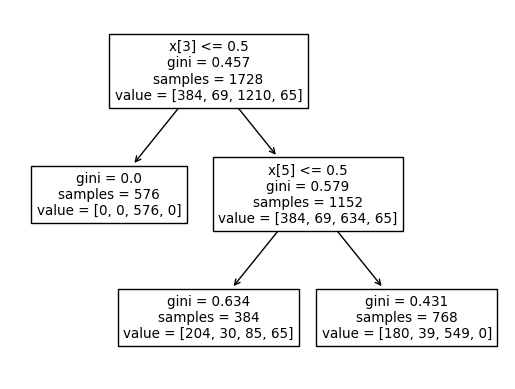

In [138]:
#Print induced trees for the voting and car data sets
from sklearn import tree
clf_cars = DecisionTreeClassifier(max_depth=2)
clf_cars.fit(X2, y2)

clf_voting = DecisionTreeClassifier(max_depth=2)
clf_voting.fit(X1, y1)
print(len(X1[0]))

tree.plot_tree(clf_cars)

# tree.plot_tree(clf_voting)



In [ ]:
# @title 2.3 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.3DT"
questions = ["What did the Decision Tree learn about the Voting dataset?", "What did the Decision Tree learn about the Cars dataset?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**What did the Decision Tree learn about the Voting dataset?**

The classifier split on physician-fee-freeze as well as adoption-of-the-budget-resolution and synfuels-corporation-cutback. With a depth of just 2, it was able to classify most of the data correctly. However, there are two other nodes that have relatively few data points that are almost complete coin flips. Those nodes would probably need larger splits. 

**What did the Decision Tree learn about the Cars dataset?**

The classifier split on persons and then on safety. I noticed how on the first split, it immediately found an attribute association that made it so 'good' was the only class on one side of the tree. From there it seems like safety wasn't enough for the model to be very accurate. It found another accociation on 'safety' and 'vgood' but the other classes were still a toss up. 

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

[Text(0.39919354838709675, 0.9583333333333334, 'x[3] <= 1.5\ngini = 0.474\nsamples = 435\nvalue = [267, 168]'),
 Text(0.16129032258064516, 0.875, 'x[2] <= 0.5\ngini = 0.038\nsamples = 258\nvalue = [253, 5]'),
 Text(0.06451612903225806, 0.7916666666666666, 'x[8] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.03225806451612903, 0.7083333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.0967741935483871, 0.7083333333333334, 'x[11] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.06451612903225806, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.12903225806451613, 0.625, 'x[15] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0967741935483871, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16129032258064516, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25806451612903225, 0.7916666666666666, 'x[2] <= 1.5\ngini = 0.016\nsamples = 249\nvalue = [247.0, 2.0]'),
 Text(0.225806451612903

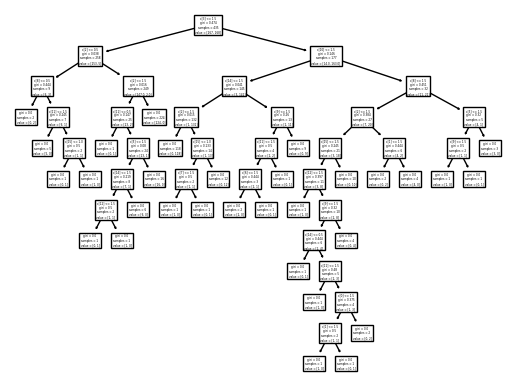

In [169]:
# Experiment with criterion parameter
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X1, y1)
tree.plot_tree(clf)



In [157]:
# @title 2.4 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "2.4DT"
questions = ["Discuss the effects each split criterion had."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss the effects each split criterion had.**

For both datasets, all three criterion had the same split attributes. It seems as though a low gini, log_loss, and entropy value means that the node will have a greater accuracy. 
Upon greater inspection, I noticed that even though classifier split on the same attributes, the actual value used to split was different. For the voting dataset, using log_loss or entropy for the criterion produced better splits. For the cars dataset, all three criterion produced the exact same splits. 
Above was with a max_depth of 2. I didn't realize we weren't supposed to use 2 but it did highlight the differences on the value level. For the voting dataset, I noticed that gini criterion produced a slighly different shaped tree than entropy and log_loss. This means that there are different splits that took place. However, the general shape of the tree is very similar between all three criterion.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [14]:
# Explore different overfit parameters


In [15]:
# @title 3.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.1DT"
questions = ["Discuss what you learned about overfit.", "Were you able to find hyperparameters that achieved a higher testing accuracy than the fully induced tree?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss what you learned about overfit.**



**Were you able to find hyperparameters that achieved a higher testing accuracy than the fully induced tree?**



### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [16]:
# Pruning

In [17]:
# @title 3.2 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "3.2DT"
questions = ["Interpret your table.", "Which ccp_alpha value achieved the best testing accuracy?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Interpret your table.**



**Which ccp_alpha value achieved the best testing accuracy?**



## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [18]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [19]:
# @title 4.1 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "4.1DT"
questions = ["Discuss your general findings.", "Did you adjust any hyperparameters to achieve a greater testing accuracy?"]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Discuss your general findings.**



**Did you adjust any hyperparameters to achieve a greater testing accuracy?**



## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly.
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

In [20]:
# @title 5.0 Discussion { display-mode: "form" }
# PLEASE DO NOT ALTER THIS CODE
if net_id == "":
  raise Exception("You need to set your net_id, silly goose.")
discussion_id = "5.0DT"
questions = ["Include a general discussion about what you did/learned by implementing your own C4.5 Decission Tree."]
Discussion(discussion_id, questions, net_id); pass

Button(description='Save Answers', style=ButtonStyle())

**Include a general discussion about what you did/learned by implementing your own C4.5 Decission Tree.**



In [21]:
from sklearn.base import BaseEstimator, ClassifierMixin

class DTClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self,counts=None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(count = [2,3,2,2])
            Dataset =
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]

        """

    def fit(self, X, y):
        """ Fit the data; Make the Decision tree

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets

        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass


    def score(self, X, y):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets
        """
        return 0

In [22]:
# Optional Debugging Dataset - Pizza Homework
# pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
# pizza_labels = np.array([2,0,1,2,1,2,1,1,0])